# Graded Exercise 1: Quadratic integrate and fire

first name: Savyaraj Ravindra

last name: Deshmukh

sciper: 309732

date: 21/03/2020

*Your teammate*

first name of your teammate: Kiarash

last name of your teammate: Farivar

sciper of your teammate: 294340


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.


** Submission **

Rename this notebook to Ex1_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

https://lcn-neurodynex-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html

## 1.1 Quadratic Integrate and Fire neuron [20 points]
This exercise is not available online. All information is given here.

1.1.1 Read the book chapter about the quadratic integrate and fire neuron
https://neuronaldynamics.epfl.ch/online/Ch5.S3.html

[0 point]

1.1.2 Implement the quadratic integrate and fire neuron in Brian2:

* Follow the [source]-link in the documentation to get the Python source code of the exponential integrate and fire neuron. https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.exponential_integrate_fire.html
* Find the one function that implements the exponential LIF. Copy that function into this notebook. Rename the function, change it's parameters and modify the dynamics from the exponential to the quadratic equation (Equation 5.16 in the book).

[6 points]

1.1.3 Call your function: 
As above, inject a current into your neuron and plot the response.


[2 points]

In [21]:
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory
import brian2 as b2
import matplotlib.pyplot as plt
import numpy


b2.defaultclock.dt = 0.05 * b2.ms

# default values.
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
u_rest = -65.0 * b2.mV
V_RESET = -60.0 * b2.mV
critical_voltage_uc = -55.0 * b2.mV
slope_a0 = 0.1 * 1/b2.mV

# a technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV


def simulate_Quadratic_IF_neuron(
        tau=MEMBRANE_TIME_SCALE_tau,
        R=MEMBRANE_RESISTANCE_R,
        u_rest=u_rest,
        v_reset=V_RESET,
        u_critical=critical_voltage_uc,
        v_spike=FIRING_THRESHOLD_v_spike,
        a0 = slope_a0,
        I_stim=input_factory.get_zero_current(),
        simulation_time=200 * b2.ms):
    """
    Implements the dynamics of the exponential Integrate-and-fire model

    Args:
        tau (Quantity): Membrane time constant
        R (Quantity): Membrane resistance
        v_rest (Quantity): Resting potential
        v_reset (Quantity): Reset value (vm after spike)
        
        v_spike (Quantity) : voltage threshold for the spike condition
        
        I_stim (TimedArray): Input current
        simulation_time (Quantity): Duration for which the model is simulated

    Returns:
        (voltage_monitor, spike_monitor):
        A b2.StateMonitor for the variable "v" and a b2.SpikeMonitor
    """

    eqs = """
    dv/dt = ( a0* (v-u_rest)* (v-u_critical) + R* I_stim(t,i) )/(tau) : volt
    """
    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset", threshold="v>v_spike", method="euler")
    neuron.v = u_rest
    
    # monitoring membrane potential of neuron and injecting current
    voltage_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)

    # run the simulation
    net = b2.Network(neuron, voltage_monitor, spike_monitor)
    net.run(simulation_time)

    return voltage_monitor, spike_monitor


nr of spikes: 3


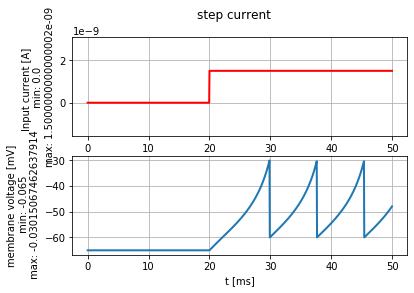

In [6]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=1.5 * b2.namp)

state_monitor, spike_monitor = simulate_Quadratic_IF_neuron(
    I_stim=input_current, simulation_time=50*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

1.1.4 Approximate the exponential model
* The quadratic model has three parameters: a0, v_rest and vc (note that this v_rest is different from the v_rest of the exponential model). They can be chosen such that the quadratic model approximates the exponential model. Read the box "Example: Approximating the exponential integrate-and-fire" in chapter http://neuronaldynamics.epfl.ch/online/Ch5.S3.html and make sure you understand figure 5.8.
* On paper, find the equations that express the parameters a0, v_rest and vc (in terms of the parameters of the exponential model) such that the two models are matched (in value, slope and curvature) at the rheobase threshold.
* In code, compute the values of a0, v_rest and vc using the values provided in the exp_IF module.


[4 points]




In [8]:
numpy.sqrt(2)

1.4142135623730951

In [16]:
# 1.1.4 Approximate the exponential model (solve it on paper, use the final expressions here)

delta = exp_IF.SHARPNESS_delta_T
v_rh = exp_IF.RHEOBASE_THRESHOLD_v_rh
expo_u_rest = exp_IF.V_REST

print('delta:')
print(delta)

A_0 = 1./ (2*delta)
print('A_0:')
print(A_0)

# the symetric difference around V_rh
diff = numpy.sqrt( 2*delta* (v_rh-expo_u_rest) - 2*delta**2 )

V_rest = (v_rh - diff)
print('V_rest:')
print(V_rest)

V_C = (v_rh + diff)   # replace this expression with the correct formula.
print('V_C:')
print(V_C)

2. mV
0.25 mV^-1
-60.65685425 mV
-49.34314575 mV


1.1.5 Simulate the quadratic- and the exponential model
* Inject the same current into an exponential- and into your (matched) quadratic model. Set the current duration to 1 second and the amplitude to I_Rh + 0.030 * b2.namp  (I_Rh as computed in exercise 3.1). Simulate for 1 second and plot the voltage responses.


[3 point]

Expo nr of spikes: 12
Quad nr of spikes: 11


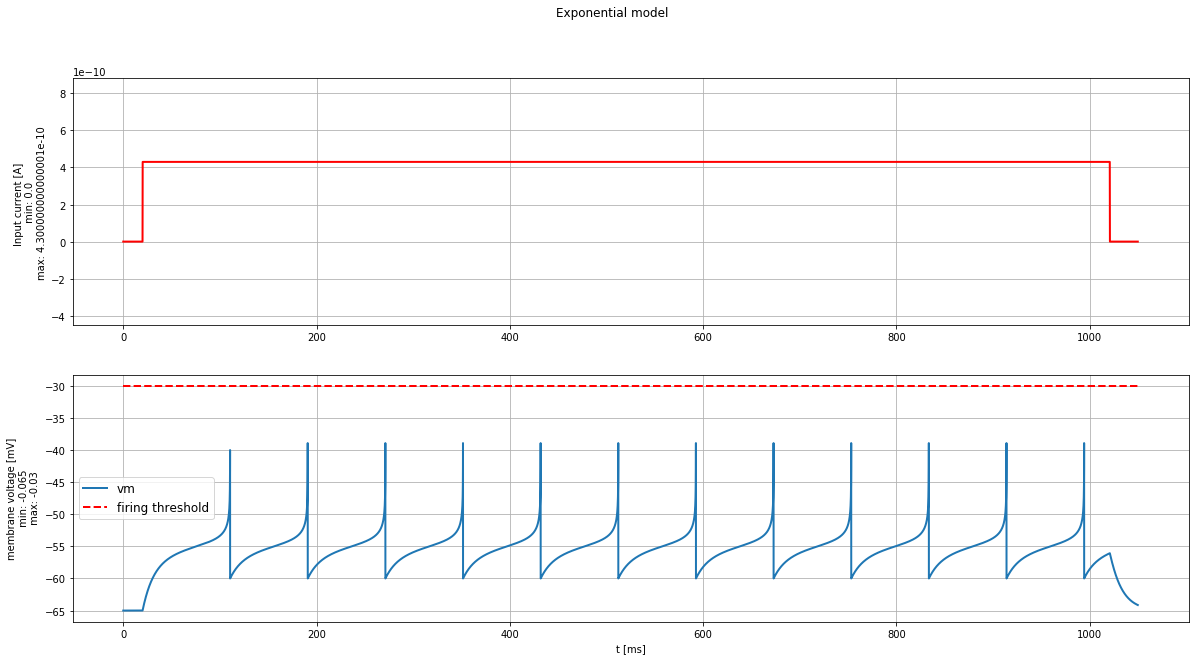

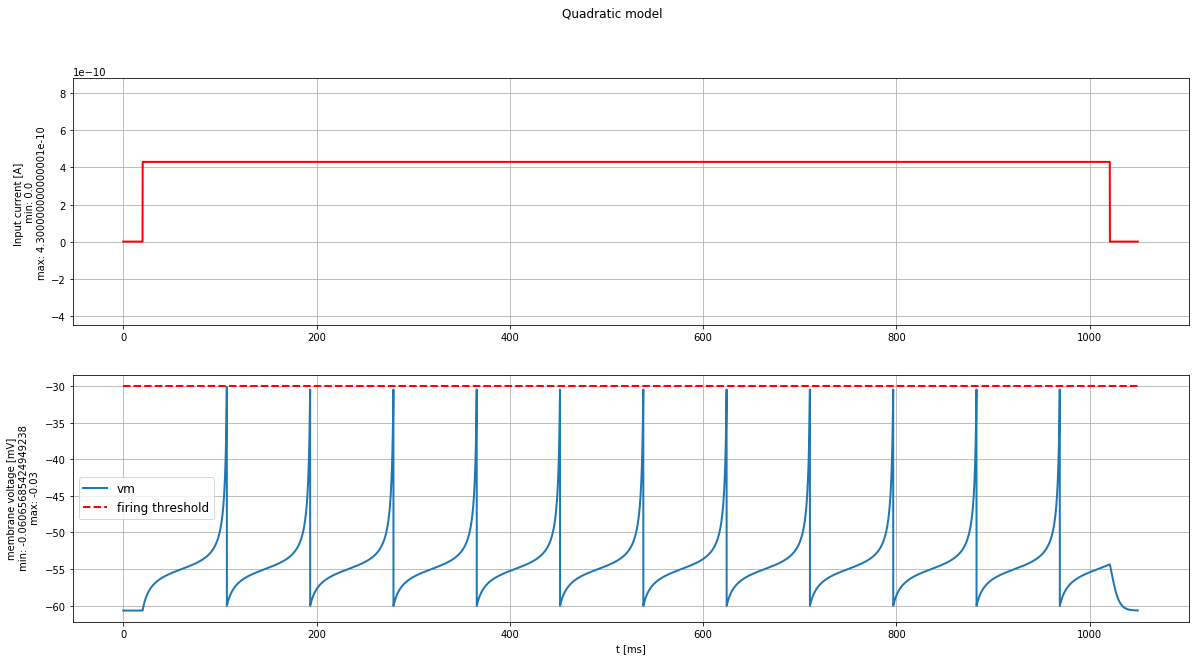

In [20]:
# 1.1.5 Simulate the quadratic- and the exponential model

# considering I_rh is tha same as the one in 2.1.1
R = exp_IF.MEMBRANE_RESISTANCE_R
I_rh = (v_rh-expo_u_rest-delta)/R

# set current
input_current = input_factory.get_step_current(
    t_start=20, t_end=1020, unit_time=b2.ms, amplitude=I_rh + 0.030 * b2.namp)

# the expo model
expo_state_monitor, expo_spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=1050*b2.ms)

# Use the parameters A_0, V_rest and V_C computed previously.
quad_state_monitor, quad_spike_monitor = simulate_Quadratic_IF_neuron(u_critical=V_C, u_rest=V_rest, a0=A_0,
                                                                     I_stim=input_current, simulation_time=1050*b2.ms)

# plot
plt.figure(figsize=(20,10))

plot_tools.plot_voltage_and_current_traces(
    expo_state_monitor, input_current,title="Exponential model",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("Expo nr of spikes: {}".format(expo_spike_monitor.count[0]))

plt.figure(figsize=(20,10))

plot_tools.plot_voltage_and_current_traces(
    quad_state_monitor, input_current,title="Quadratic model",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("Quad nr of spikes: {}".format(quad_spike_monitor.count[0]))

## 1.1.6 Discuss your observation [5 point]

Explain your observations here. Qualitatively compare the voltage traces of the exponential- and the quadratic model. Is the number of spikes the same for the two models?

### Answer:
The number of spikes for the two is different the quadratic is one less.

if we look at the -50mV line we can see that distance between the two sides of the curve is bigger for the quadratic model meaning the quadratic is slower in the rising phase of an AP compared to the exponential. But initially in the rise from u_rest the quadratic is faster.

We have used a higher u_rest for the quadratic to fit it to exponential.

# Ex. 2. AdEx: the Adaptive Exponential Integrate-and-Fire model

Use function [`AdEx.simulate_AdEx_neuron()`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.adex_model.html) to run the model for different input currents and different parameters. Get started by running the following script:

In [20]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory
import matplotlib.pyplot as plt

## 2.1. Exercise: Adaptation and firing patterns [13 points]

We have implemented an Exponential Integrate-and-Fire model with a single adaptation current
$\begin{split}\left[\begin{array}{ccll}
{\displaystyle \tau_m \frac{du}{dt}} &=& -(u-u_{rest}) + \Delta_T exp(\frac{u-\vartheta_{rh}}{\Delta_T}) - R w + R I(t) \\[.2cm]
{\displaystyle \tau_w \frac{dw}{dt}} &=& a (u-u_{rest}) -w  + b \tau_w \sum_{t^{(f)}} \delta (t - t^{(f)})
 \\[.2cm]
\end{array}\right.\end{split}$

- When you simulate the model with the default parameters, it produces the voltage trace shown above. Describe that firing pattern. Use the terminology of Fig. 6.1 in [Chapter 6.1](https://neuronaldynamics.epfl.ch/online/Ch6.S1.html) [max 2 lines, 1 point]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4fbe2470b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4fb4078da0>)

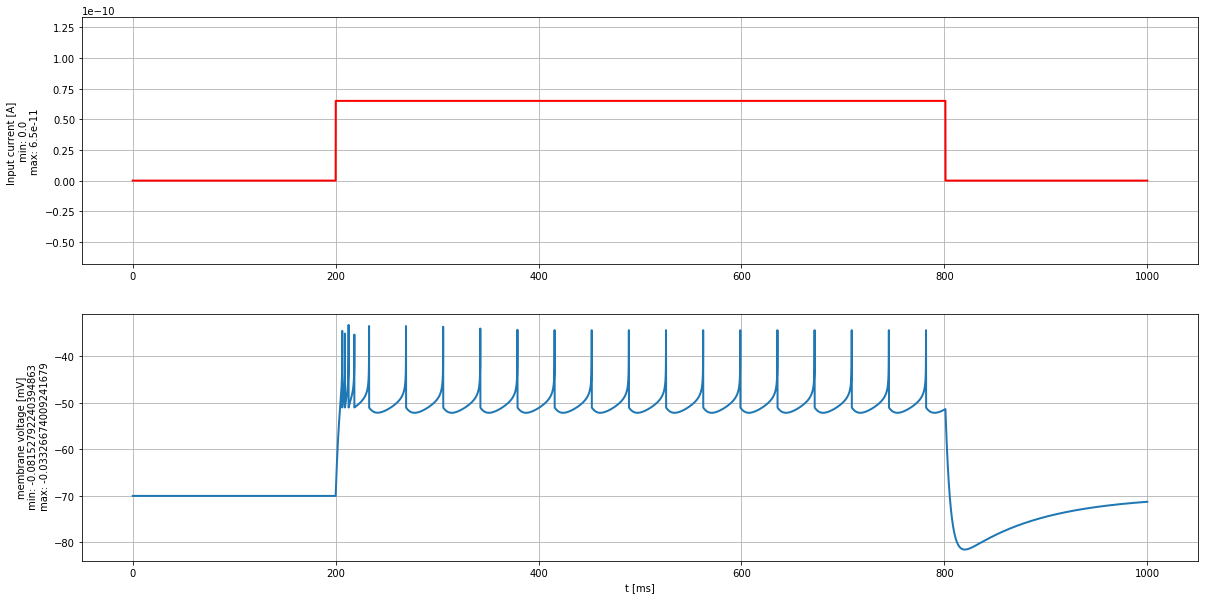

In [97]:
current = input_factory.get_step_current(200, 800, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=1000 * b2.ms)
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor, current)

**Ans:** 
- A burst of spikes in the beggining indicate **initial bursting** pattern
- A constant frequency firing after the initial burst indicates a **tonic** firing pattern

- Call the function `AdEx.simulate_AdEx_neuron()` with different parameters and try to create adapting, bursting and irregular firing patterns. Table 6.1 in Chapter 6.1 provides a starting point for your explorations. 

**Note:** If you want to set a parameter to 0, Brian still expects a unit. Therefore use `a=0*b2.nS` instead of `a=0`.

If you do not specify any parameter, the following default values are used:

`MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms`

`MEMBRANE_RESISTANCE_R = 500*b2.Mohm`

`V_REST = -70.0 * b2.mV`

`V_RESET = -51.0 * b2.mV`

`RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV`

`SHARPNESS_delta_T = 2.0 * b2.mV`

`ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS`

`ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms`

`SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA`

[2 points]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4fbc6a2d30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4faf96e198>)

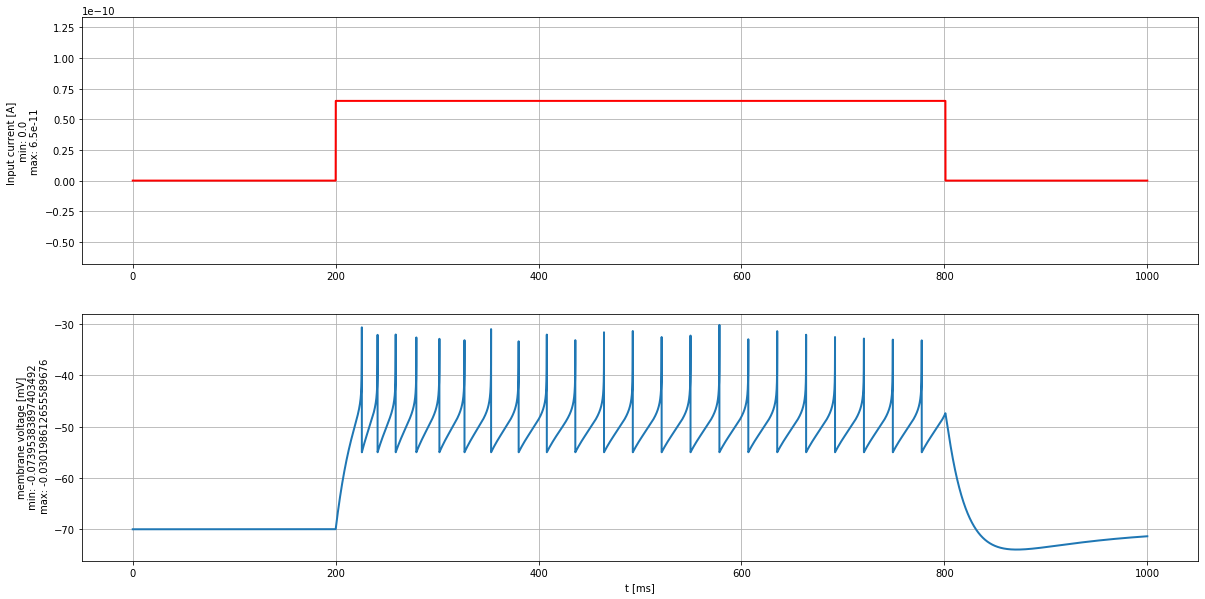

In [98]:
# adapting firing pattern

% matplotlib inline
import brian2 as b2

tau_m_adapting = 20.0*b2.msecond
v_reset_adapting = -55.0*b2.mvolt
a_adapting = 0.0*b2.nsiemens
b_adapting = 5.0*b2.pamp
taw_w_adapting = 100.0*b2.msecond

state_monitor_adapting, temp  = AdEx.simulate_AdEx_neuron(tau_m=tau_m_adapting, v_reset=v_reset_adapting,
                                                          a=a_adapting, b= b_adapting, 
                                                          I_stim=current, simulation_time=1000. * b2.msecond)
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor_adapting, current)


[2 points]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4fb4d4b240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4faf29c9b0>)

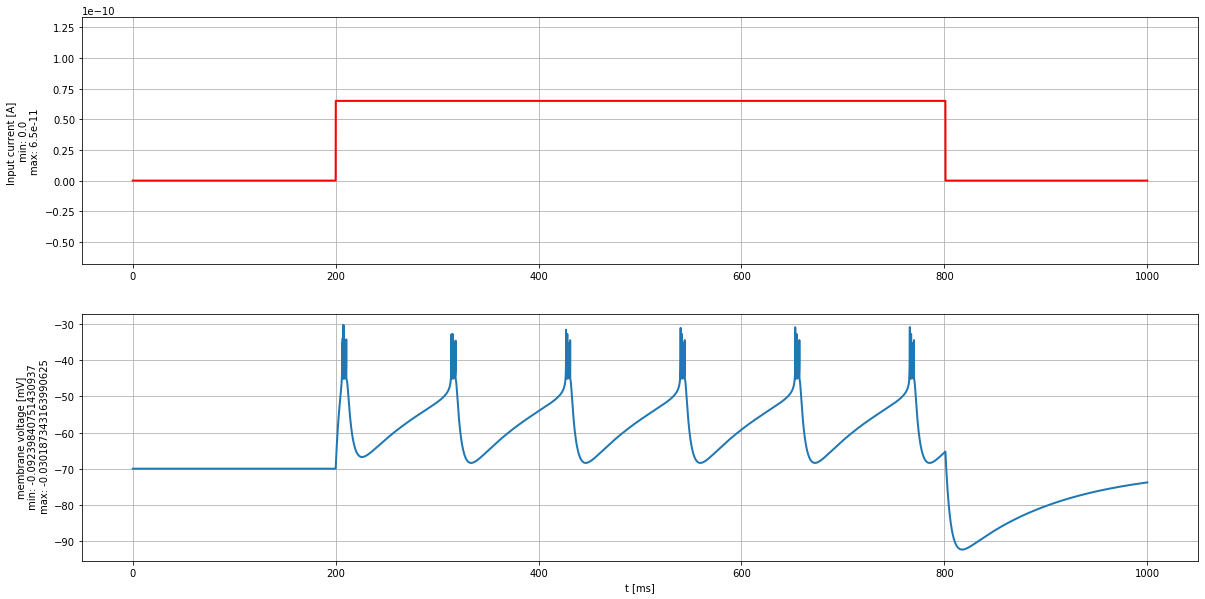

In [99]:
# bursting firing pattern

tau_m_bursting = 5.0*b2.msecond
v_reset_bursting = -45.0*b2.mvolt
a_bursting = 0.0*b2.nsiemens
b_bursting = 10.0*b2.pamp
taw_w_bursting = 100.0*b2.msecond

state_monitor_bursting, temp = AdEx.simulate_AdEx_neuron(tau_m=tau_m_bursting, v_reset=v_reset_bursting,
                                                          a=a_bursting, b= b_bursting, 
                                                          I_stim=current, simulation_time=1000. * b2.msecond)
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor_bursting, current)


[2 points]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4faf912278>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4fae2c7d68>)

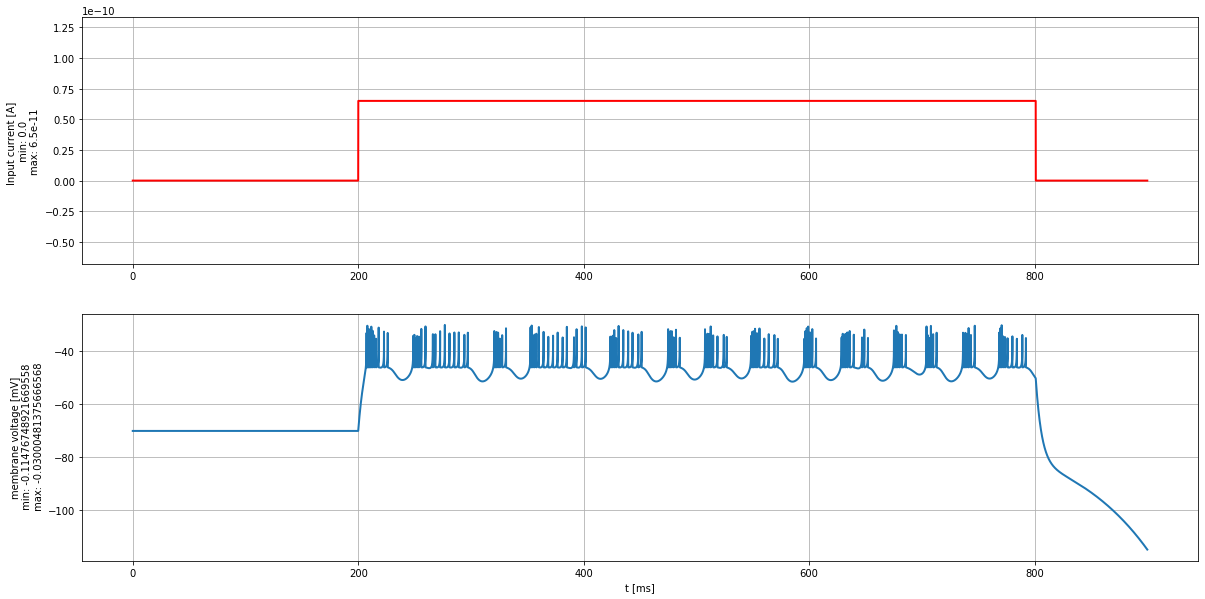

In [105]:
# irregular firing pattern

tau_m_irr = 6*b2.msecond
v_reset_irr = -46.0*b2.mvolt
a_irr = -5.0*b2.nsiemens
b_irr = 7.0*b2.pamp
taw_w_irr = 100.0*b2.msecond

state_monitor_irr, temp = AdEx.simulate_AdEx_neuron(tau_m=tau_m_irr, v_reset=v_reset_irr,
                                                          a=a_irr, b= b_irr, 
                                                          I_stim=current, simulation_time=900. * b2.msecond)
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor_irr, current)

[2 points]

## 2.2. Exercise: phase plane and nullclines [12 points]

First, try to get some intuition on shape of nullclines by plotting or simply sketching them on a piece of paper and answering the following questions.
Plot or sketch the u- and w- nullclines of the AdEx model (`I(t) = 0`)
- What is the direction of the flow arrows on the u-nullcline ?

**Ans:** vertical.

since the derivative of the horizontal variable, `u` is zero on the u-nullcline 

thus, only vertical arrows facing upward or downward are present depending on the sign and magnitude of $\frac{dw}{dt}$
- How do the nullclines change with respect to `a`?

**Ans:** Slope of $w$ nullcline increases with `a` due to the linear term $w = a (u-u_{rest}) + ...$

$u$ nullcline remains unaffected since `a` does not appear in the equation for $u$

- What is the interpretation of parameter `b`?

**Ans:** `b` represents the spike triggered increase in adaptation current

integrating the delta function at spikes makes the $w$ variable 'jump' by `b`

- How do flow arrows change as tau_w gets bigger?

**Ans:** Increasing $\tau_w$ makes flows more and more horizontal since changes in membrane potential are much faster than the adaptation current 

[max 10 lines, 4 points]

Take `a = 0`. Find a set of parameters such that, by changing `b` only, we can see two qualitatively different firing patterns. Simulate these two patterns and write their names.

[4 points]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4fb814d0f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4faeacce80>)

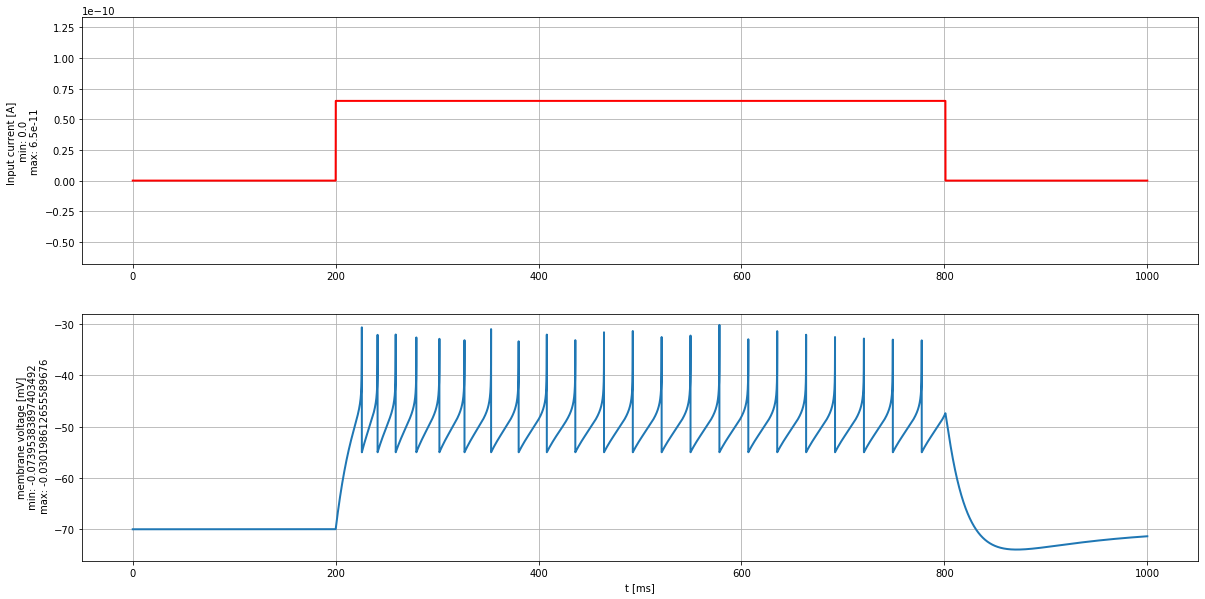

In [101]:
# First firing pattern (simulation [2 points] and pattern name [2 points])
tau_m_1 = 20*b2.msecond
v_reset_1 = -55.0*b2.mvolt
a_1 = 0.0*b2.nsiemens
b_1 = 5.0*b2.pamp       #large b
taw_w_1 = 100.0*b2.msecond

state_monitor_1, temp = AdEx.simulate_AdEx_neuron(tau_m=tau_m_1, v_reset=v_reset_1,
                                                          a=a_1, b= b_1, 
                                                          I_stim=current, simulation_time=1000. * b2.msecond)
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor_1, current)

**Pattern 1:** adapting
- small jump b of the spike triggered adaptation current leads to slow decrease in spiking frequency, which produces adapting firing pattern 

[4 points]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4faf28c6d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4faf9323c8>)

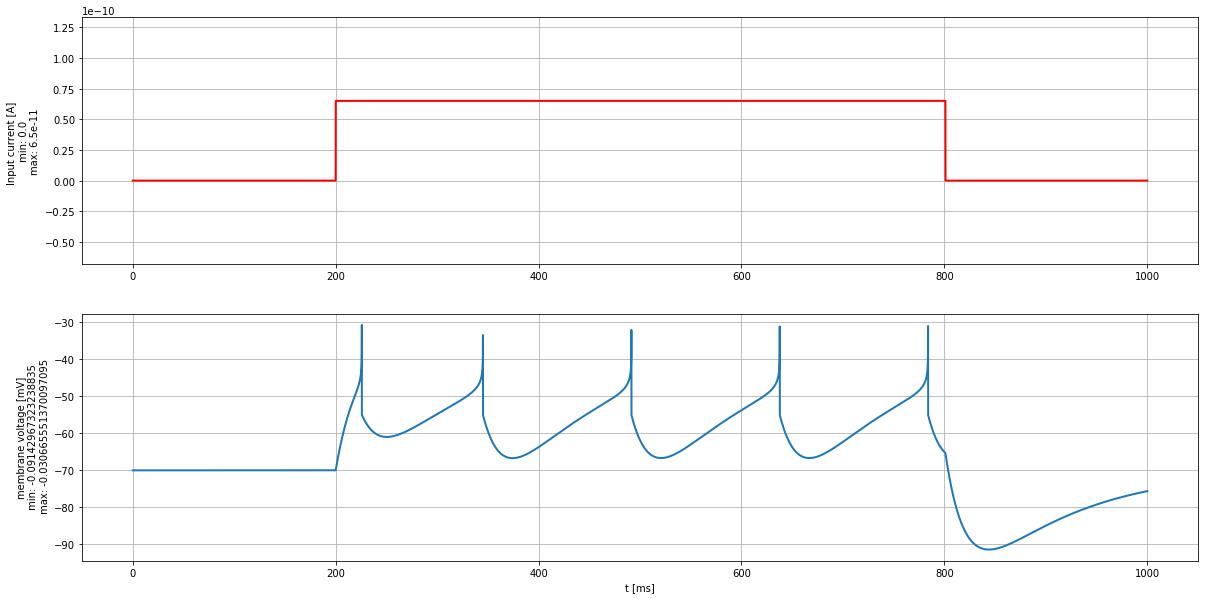

In [102]:
# Second firing pattern (simulation [2 points] and pattern name [2 points])
tau_m_2 = 20*b2.msecond
v_reset_2 = -55.0*b2.mvolt
a_2 = 0.0*b2.nsiemens
b_2 = 60.0*b2.pamp
taw_w_2 = 100.0*b2.msecond

state_monitor_2, temp = AdEx.simulate_AdEx_neuron(tau_m=tau_m_2, v_reset=v_reset_2,
                                                          a=a_2, b= b_2, 
                                                          I_stim=current, simulation_time=1000. * b2.msecond)
plt.figure(figsize=(20,10))
plot_tools.plot_voltage_and_current_traces(state_monitor_2, current)

**Pattern 2:** tonic
- large jump $b$ on the other hand causes sudden jump in adaptation variable $w$, which produces evenly spaced spikes at low frequency, tonic firing pattern